In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Savoir si un passager a survécu ou non grâce à ses caractéristiques

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


/tmp/ipykernel_10848/894892391.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(titanic.corr())
/tmp/ipykernel_10848/894892391.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr() , annot=True)


            survived    pclass       sex       age     sibsp     parch  \
survived    1.000000 -0.338481 -0.543351 -0.077221 -0.035322  0.081629   
pclass     -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
sex        -0.543351  0.131900  1.000000  0.093254 -0.114631 -0.245489   
age        -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
sibsp      -0.035322  0.083081 -0.114631 -0.308247  1.000000  0.414838   
parch       0.081629  0.018443 -0.245489 -0.189119  0.414838  1.000000   
fare        0.257307 -0.549500 -0.182333  0.096067  0.159651  0.216225   
adult_male -0.557080  0.094035  0.908578  0.280328 -0.253586 -0.349943   
alone      -0.203367  0.135207  0.303646  0.198270 -0.584471 -0.583398   

                fare  adult_male     alone  
survived    0.257307   -0.557080 -0.203367  
pclass     -0.549500    0.094035  0.135207  
sex        -0.182333    0.908578  0.303646  
age         0.096067    0.280328  0.198270  
sibsp       0.159651   -0.253586 -

<AxesSubplot: >

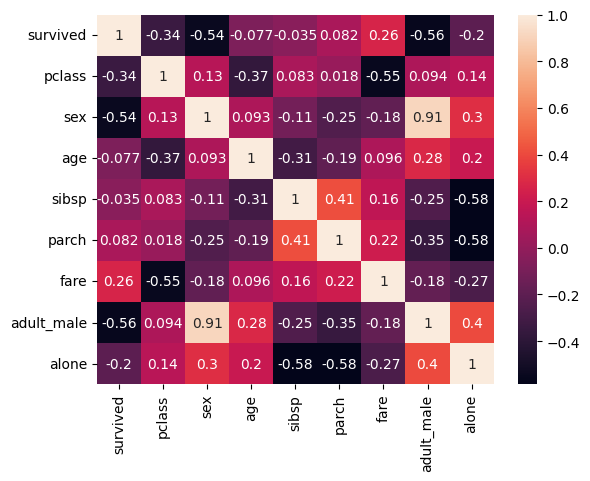

In [3]:
# Création d'une nouvelle colonne 'sex_binary' avec des valeurs 0 et 1
titanic['sex'] = titanic['sex'].map({'female': 0, 'male': 1})

print(titanic.corr())
# fait le graphique de correlation que pour le survived
sns.heatmap(titanic.corr() , annot=True)


/tmp/ipykernel_10848/563135242.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic = titanic.fillna(titanic.mean())


<AxesSubplot: >

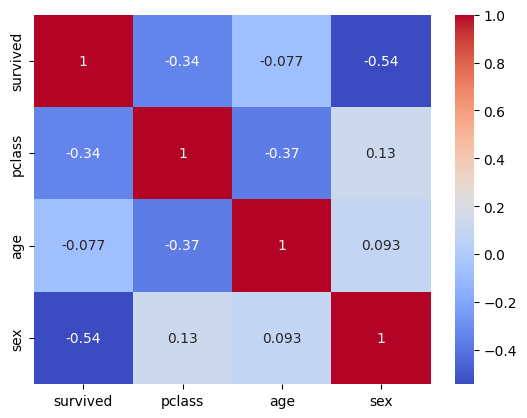

In [4]:
corr_df = titanic[['survived', 'pclass', 'age' , 'sex']]
# Calcul de la matrice de corrélation
corr_matrix = corr_df.corr()
titanic = titanic.fillna(titanic.mean())
# Affichage du heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Test Model

In [5]:
X = titanic[['pclass', 'age' , 'sex']]
y = titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.7932960893854749

## Cross Validation et Validation Curve

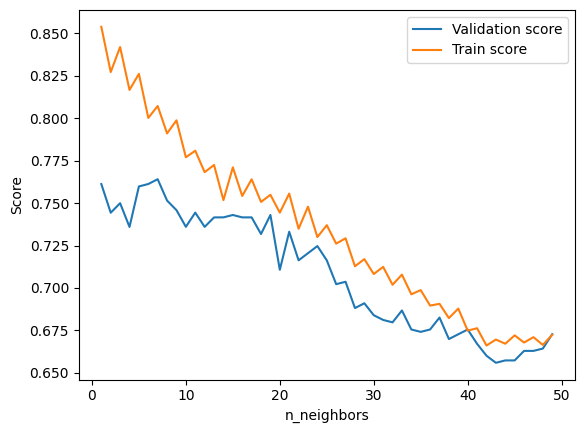

In [6]:
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score , val_score = validation_curve(model, X_train, y_train, param_name="n_neighbors", param_range=k, cv=5)
fig , ax = plt.subplots()
ax.plot(k, val_score.mean(axis=1), label="Validation score")
ax.plot(k, train_score.mean(axis=1), label="Train score")
ax.set_xlabel("n_neighbors")
ax.set_ylabel("Score")
plt.legend()


## Grid Search CV

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance'],
              }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [9]:
grid.best_score_

0.7921993499458289

In [10]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

In [11]:
model = grid.best_estimator_

In [12]:
model.score(X_test, y_test)

0.7653631284916201

## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix

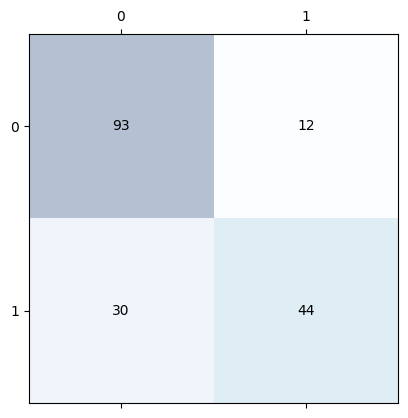

In [14]:
confusion_f = confusion_matrix(y_test, model.predict(X_test))
# faire un graphique de confusion_f
fig , ax = plt.subplots()
ax.matshow(confusion_f, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_f.shape[0]):
    for j in range(confusion_f.shape[1]):
        ax.text(x=j, y=i, s=confusion_f[i, j], va='center', ha='center')

# Learning Curve

In [15]:
from sklearn.model_selection import learning_curve

[ 56 113 170 227 284 341 398 455 512 569]


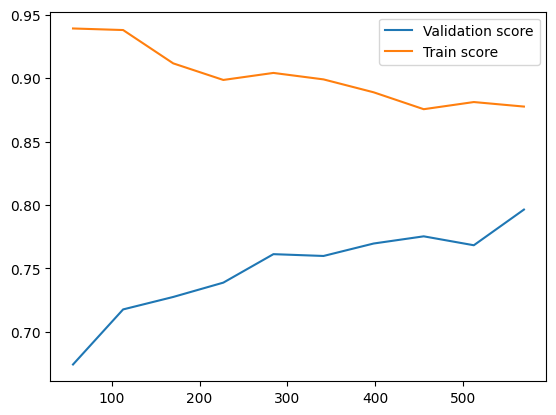

In [16]:
N , train_score , val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0 , 10), cv=5)
print(N)
fig , ax = plt.subplots()
ax.plot(N, val_score.mean(axis=1), label="Validation score")
ax.plot(N, train_score.mean(axis=1), label="Train score")
plt.legend()
plt.show()

In [17]:
model.predict_proba([[2, 22, 1]])

/home/thomas59/anaconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])